# Demo

# Read in data

#### First we need to read in our data set which can be found in ______. To read the information from the file, we will need to enlist the help of pandas. Using pandas, you can read files from both local files and the internet! Pretty neat, right? Let's import that now.

In [127]:
# For reading data sets
import pandas

#### We want to be able to save this information in a way that is organized like the original data set. An array will suffice, with each row representing an individual student and each column representing an individual feature (like school and final grade). Numpy provides us with a way to create such an array and more functionality that will prove to be quite useful in our endeavors. Let's import that too.

In [128]:
# For lots of awesome things
import numpy as np

#### Now it's time to read in the data! We're going to save it in an array called "student_data." We need to tell pandas the file we want to read from, how the information is seperated, or delimited, (it's seperated by semicolons ";") and if there is a header, which there is. If you look at the file, you will see that the first row, row 0, tells us what can be found in each column

In [129]:
# Read in student data
student_data = np.array(pandas.read_table("./student-por.csv",
delimiter=";", header=0))

# Display student data
student_data

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'F', 18, ..., 11, 12, 9],
       ['MS', 'M', 17, ..., 10, 10, 10],
       ['MS', 'M', 18, ..., 10, 11, 11]], dtype=object)

#### Later, we will need to know what each feature(column) represents. Let's import those descriptions now. We only need to read in one row but we need to let pandas know not to ignore the header.

In [130]:
# Descriptions for each feature (found in the header)
feature_descrips = np.array(pandas.read_csv("./student-por.csv",
delimiter=";", header=None, nrows=1))

# Display descriptions
print(feature_descrips)

[['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
  'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures'
  'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet'
  'romantic' 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health'
  'absences' 'G1' 'G2' 'G3']]


#### Hm..those descripriptions aren't very specific. Let's store some more detailed information. These descriptions were constructed using the description of attributes in Table 1 of Cortez and Silva's report.

In [131]:
# More detailed descriptions
feature_descrips = np.array(["School", "Sex", "Age", "Urban or Rural Address", "Family Size", 
                             "Parent's Cohabitation status", "Mother's Education", "Father's Education",
                             "Mother's Job", "Father's Job", "Reason for Choosing School", 
                             "Student's Gaurdain", "Home to School Travel Time", "Weekly Study Time",
                             "Number of Past Class Failures", "Extra Educational Support", 
                             "Family Educational Support", "Extra Paid Classes", "Extra Curricular Activities",
                             "Attended Nursery School", "Wants to Take Higher Education", "Internet Access at Home", 
                             "In a Romantic Relationship", "Quality of Family Relationships",
                             "Free Time After School", "Time Spent Going out With Friends", 
                             "Workday Alcohol Consumption", "Weekend Alcohol Consumption", 
                             "Current Health Status", "Number of Student Absences", "First Period Grade",
                             "Second Period Grade", "Final Grade"])

# Data Cleanup

#### Woohoo! Now we have all the information we need. Don't get too excited, though. We can't start building and training our neural net yet. We need to tidy up the data to make it easier for our net to learn.

## Shuffle data

#### The data is split by school, meaning all the students represented in the first part of this data set went to one school (GP - Gabriel Pereira ) and the rest went to another (MS - Mousinho da Silveira). This isn't ideal. We want our network to see student data from both schools and don't want it to get used to only seeing one. Let's shuffle the data. I told you numpy would come in handy again...

In [132]:
# Shuffle the data!
np.random.shuffle(student_data)
student_data

array([['GP', 'F', 17, ..., 15, 16, 17],
       ['GP', 'F', 18, ..., 14, 17, 17],
       ['MS', 'M', 16, ..., 14, 12, 13],
       ...,
       ['GP', 'F', 18, ..., 11, 12, 14],
       ['GP', 'M', 16, ..., 12, 11, 11],
       ['GP', 'F', 16, ..., 11, 12, 12]], dtype=object)

## Numerically Classify Scores

#### Now we're going to classify the grades. Currently, each student has a final frade between 0 and 19, inclusive. We're going to classify them like letter grades, with 4 representing an A and 0 represeting an F

In [133]:
# Array holding final scores for every student
scores = student_data[:,32]

# Iterate through list of scores, changing them from a 0-19 value
## to a 0-4 value (representing F-A)
for i in range(len(scores)):
    if(scores[i] > 18):
        scores[i] = 4
    elif(scores[i] > 16):
        scores[i] = 3
    elif(scores[i] > 14):
        scores[i] = 2
    elif(scores[i] > 12):
        scores[i] = 1
    else:
        scores[i] = 0
        
# Update the final scores in student_data to reflect these changes
for i in range(len(scores)):
    student_data[i,32] = scores[i]
    
# Display new data. Hint: Look at the last column
student_data

array([['GP', 'F', 17, ..., 15, 16, 3],
       ['GP', 'F', 18, ..., 14, 17, 3],
       ['MS', 'M', 16, ..., 14, 12, 1],
       ...,
       ['GP', 'F', 18, ..., 11, 12, 1],
       ['GP', 'M', 16, ..., 12, 11, 0],
       ['GP', 'F', 16, ..., 11, 12, 0]], dtype=object)

## Encoding Non-Numeric Data to Integers

#### Let's take a look at a student sample from our data set.

In [134]:
# one student sample
student_data[0,:]

array(['GP', 'F', 17, 'R', 'GT3', 'T', 4, 4, 'teacher', 'teacher',
       'course', 'mother', 1, 1, 0, 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'no', 4, 4, 4, 1, 1, 5, 2, 15, 16, 3], dtype=object)

#### As you can see, several of our features have string values that don't mean much to our neural net. Let's encode these labels into integers using with sklearn's Label Encoder.

In [135]:
# Need this for LabelEncoder
from sklearn import preprocessing

# Label Encoder
le = preprocessing.LabelEncoder()

# Columns that hold non-numeric data
indices = np.array([0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])

# Transform the non-numeric data in these columns to integers
for i in range(len(indices)):
    # COMMENT THIS, PLEASE
    column = indices[i]
    le.fit(student_data[:,column])
    student_data[:,column] = le.transform(student_data[:,column])

#### Let's take a look at what that student sample looks like now.

In [136]:
student_data[0,:]

array([0, 0, 17, 0, 0, 1, 4, 4, 4, 4, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 4, 4, 4, 1, 1, 5, 2, 15, 16, 3], dtype=object)

## Encoding 0's to -1 for Binomial Data

### Perfect, right? Well, not quite. When a neural net sees a feature has a value of 0, it takes it as there is no value which in turn will cause the weights (what drives our neural net) to not turn on. Let's fix that by changing the zeros in the binomial data to -1's.

In [137]:
# Columns that hold binomial data
indices = np.array([0,1,3,4,5,15,16,17,18,19,20,21,22])

# Change 0's to -1's
for i in range(len(indices)):
    column = indices[i]
    
    # values of current feature
    feature = student_data[:,column]
    
    # change values to -1 if equal to 0
    feature = np.where(feature==0, -1, feature)
    student_data[:,column] = feature
    
student_data[0,:]

array([-1, -1, 17, -1, -1, 1, 4, 4, 4, 4, 0, 1, 1, 1, 0, -1, -1, -1, 1, 1,
       1, 1, -1, 4, 4, 4, 1, 1, 5, 2, 15, 16, 3], dtype=object)

## Standardizing Nominal and Numerical Data

### Help, please

In [138]:
scaler = preprocessing.StandardScaler()

In [139]:
temp = student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]]
print(student_data[0,:])
Standardized = scaler.fit_transform(temp)

[-1 -1 17 -1 -1 1 4 4 4 4 0 1 1 1 0 -1 -1 -1 1 1 1 1 -1 4 4 4 1 1 5 2 15
 16 3]


/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
print('Mean:', round(Standardized.mean()))
print('Standard deviation:', Standardized.std())

Mean: -0.0
Standard deviation: 1.0


In [141]:
student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]] = Standardized

In [142]:
student_data[0,:]

array([-1, -1, 0.210136683627676, -1, -1, 1, 1.310215632680141,
       1.5407154371084224, 1.6503337996995997, 2.057247821444129,
       -0.9339740507872132, 0.3326475069742608, -0.7600319244561617,
       -1.122808480157685, -0.3743051181921297, -1, -1, -1, 1, 1, 1, 1,
       -1, 0.07260614867809903, 0.7804782639289712, 0.6937849605682166,
       -0.5435553304269218, -0.9976946599159401, 1.0129025496993858,
       -0.3578630461124801, 1.3126972261774086, 1.5215712933172525, 3],
      dtype=object)

## One-Hot Encode Results

#### Our results are currently floating point numbers. We want to categorize them so the net views them as seperate values (or grades). To do this, we will one-hot encode them. This means that each grade will have an array of all zeroes except for one element, which will be a 1. This is kind of like the grade's ID. So for examples, F would be 10000 and D would be 01000. There are 5 unique grades [A-F] so there are 5 digits in each "ID."

In [143]:
# Final grades
results = student_data[:,32]

# Take a look at first 5 final grades
print("First 5 final grades:", results[0:5])

# All unique values for final grades (0-4 representing F-A)
possible_results = np.unique(student_data[:,32]).T
print("All possible results:", possible_results)

First 5 final grades: [3 3 1 0 1]
All possible results: [0 1 2 3 4]


#### Keras has an awesome built-in function that allows us to categorize the results in such a way. Keras is the library we will be using to build our network. Let's import it now so we can take advantage of its wonderful functionality.

In [144]:
# For building our net
import keras

# One-hot encode final grades (results) which will be used as our output
# The length of the "ID" should be as long as the total number of possible results so each results
## gets its own, personal one-hot encoding
y = keras.utils.to_categorical(results,len(possible_results))

# Take a look at the first 5 final grades now (no longer numbers but arrays)
y[0:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

#### We set these categorized results equal to y because this is the -output- of our neural net which is intaking all features except the final grade. We shall call the set of these -inputs- x.

In [145]:
# Our input, all features except final grades
x = student_data[:,0:32]

# Model Building

#### ADD ME

In [146]:
# Function to create network given model
def create_network(model):
    # Specify input/output size
    input_size = x.shape[1]
    output_size = y.shape[1]

    # Creeate the hidden layer
    model.add(keras.layers.Dense(800, input_dim = input_size, activation = 'relu'))

    # Additional hidden layer
    model.add(keras.layers.Dense(400,activation='relu'))

    # Output layer
    model.add(keras.layers.Dense(output_size,activation='softmax'))

    # Compile - why using adamax?
    model.compile(loss='categorical_crossentropy',
                  optimizer='adamax', 
                  metrics=['accuracy'])

#### ADD ME

In [147]:
# Feed-forward model
model = keras.Sequential()
create_network(model)

# Initial Test of the Network

#### Now let's see what this net can do! Before we do that, though, we need to split our data into to groups: one for training (our network will see this data and "learn" it) and one for testing. The testing data is data the network hasn't seen before. Once we're done training, we'll feed it the the trained network and see how well it outputs what it is supposed to. 20% of the 649 individual student statistics (approximately 130) will be designated to the testng data group.

In [148]:
# Split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

y_train = y[0:518,:]
y_test = y[519:649,:]

#### To train our neural network, we're going to use the fit() member function which we can access through the model we created. There are certain things we need to specify.
#### - First we need to tell the model that it will fed the training input and should produce the training output. 
#### -Then we need to specify the batch size. In this case, it's 32 (the default value for batch size). This means the net will go through 32 samples before it updates any of the weights that drive it. 
#### - The number of epochs describes how many times we want the net to see all samples of our data. Our net will run through all of our data 7 times.
#### - We set verbose to 0 because we don't care too much about the accuracy and loss rates at each epoch nor how long it takes for each epoch to run. We're concerned only about the end result so we're going to opt out of this.
#### - Finally we have the validation split which is set to 0.2 (20%). This means 20% of the training data will actually be used for validation instead of training. The model sees and learns from the initial 80% of the data and then uses the validation data to get used to seeing new things and being able to recognize them (generalization).

In [98]:
# Train on training data! 
# We're saving this information in the variable -history- so we can take a look at it later
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

#### Now it's time to see how the neural net performs on our testing data (the data it has never seen before). We're going to use the -evaluate- function to do this.

In [99]:
# Validate using data the network hasn't seen before (testing data)
# Save this info in -score- so we can take a look at it
score = model.evaluate(x_test,y_test, verbose=0)

# Check it's effectiveness
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.640423073218419
Test accuracy: 0.7692307692307693


#### It'd be nice to see a more visual representation of how our training went, don't you think? Let's make a plot to do just that. Since we're going to be doing this several times, we're going to create a function that takes in the history of model training and plots the training accuracy and loss (shown in blue) and the validation accuracy and loss (shown in orange). Too plot, we're going to need to inport matplotlib.pyplot.

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the data
def plot(history):

    plt.figure(1)

    # Summarize history for accuracy

    plt.subplot(211)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc ='upper left')

    # Summarize history for loss

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc ='upper left')

    # Display plot
    
    plt.tight_layout()
    plt.show()

#### Let's put this function to good use and plot the current training and validation info that is stored in -history-

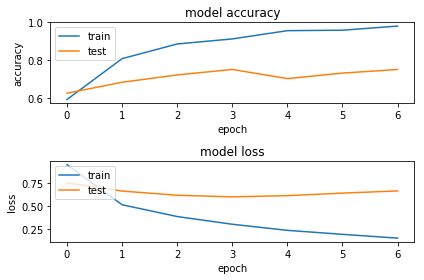

In [101]:
# Plot current training and validation accuracy and loss
plot(history)

# Training and Testing Without Individual Features

#### A few questions now come to mind. Are all of these features important? Would removing unimportant ones improve accuracy? What features are most essential to maintaining a good accuracy? To answer these questions, we're going to try trainining the network with all featues except one. Since we're going to be doing this for 32 features, let's make a general function we can call that takes the index of the feature we want to remove and trains the network with all the features except that one.

In [106]:
# Analyze the effects of removing one feature on training
def remove_and_analyze(feature):
    # Told you those feature descriptions would be useful
    print("Without feature", feature, ":", feature_descrips[feature])
    
    # Create feed-forward network
    model = keras.Sequential()
    create_network(model)
    
    # Remove feature from columns (axis 1)
    x = np.delete(student_data, feature, axis = 1)
    
    # Split data into training and testing data
    x_train = x[0:518,:]
    x_test = x[519:649,:]
    
    # Train on training data!
    history = model.fit(x_train, y_train,
                        batch_size = 32, 
                        epochs = 7, 
                        verbose = 0, 
                        validation_split = 0.2)
    
    # Validate using data the network hasn't seen before (testing data)
    score = model.evaluate(x_test,y_test, verbose=0)
    
    # Check it's effectiveness
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    # Plot the data
    plot(history)

In [107]:
student_data.shape[1]

33

#### Now we'll run this function 32 times (once for each feature).

Without feature 0 : School
Test loss: 0.2279880481557204
Test accuracy: 0.9384615384615385


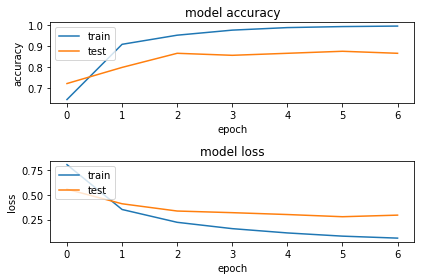


 
 

Without feature 1 : Sex
Test loss: 0.25574013287058245
Test accuracy: 0.9


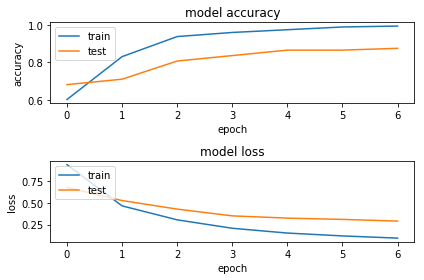


 
 

Without feature 2 : Age
Test loss: 0.24113501075368662
Test accuracy: 0.9307692307692308


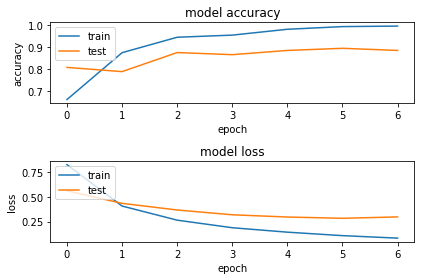


 
 

Without feature 3 : Urban or Rural Address
Test loss: 0.2768549217627599
Test accuracy: 0.9230769230769231


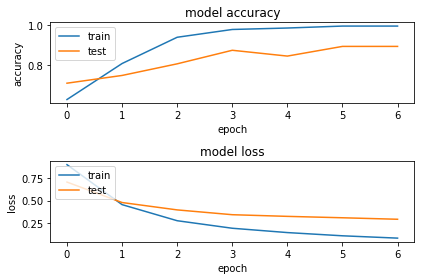


 
 

Without feature 4 : Family Size
Test loss: 0.23128865544612592
Test accuracy: 0.9153846153846154


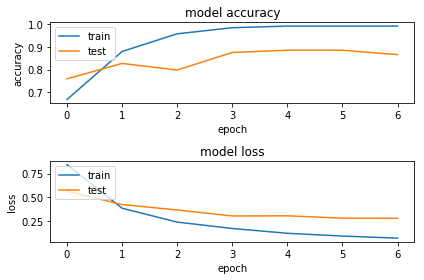


 
 

Without feature 5 : Parent's Cohabitation status
Test loss: 0.2579712632756967
Test accuracy: 0.9076923076923077


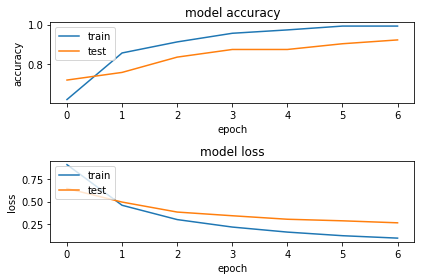


 
 

Without feature 6 : Mother's Education
Test loss: 0.2783838296165833
Test accuracy: 0.9076923076923077


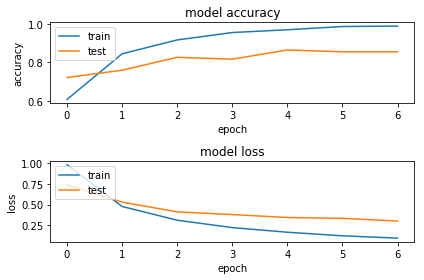


 
 

Without feature 7 : Father's Education
Test loss: 0.217332611232996
Test accuracy: 0.9461538461538461


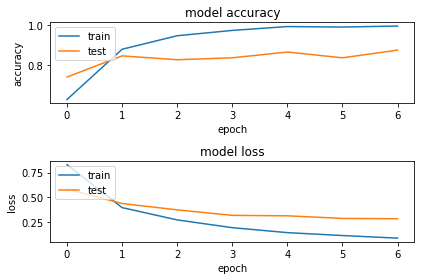


 
 

Without feature 8 : Mother's Job
Test loss: 0.2457890033148802
Test accuracy: 0.9076923076923077


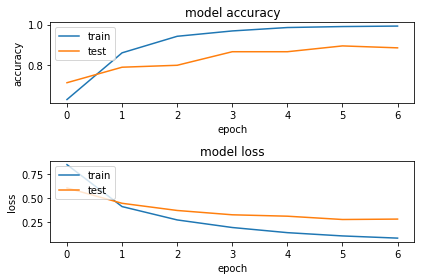


 
 

Without feature 9 : Father's Job
Test loss: 0.21022808809693044
Test accuracy: 0.9384615384615385


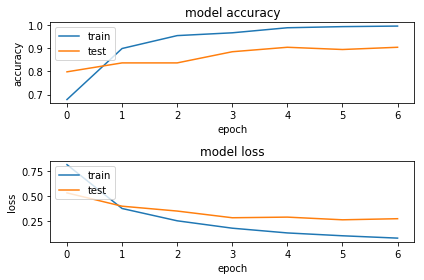


 
 

Without feature 10 : Reason for Choosing School
Test loss: 0.24684933848105944
Test accuracy: 0.9153846153846154


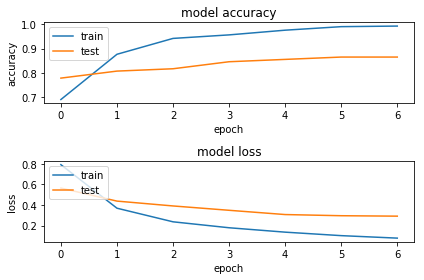


 
 

Without feature 11 : Student's Gaurdain
Test loss: 0.28665187599567266
Test accuracy: 0.9307692307692308


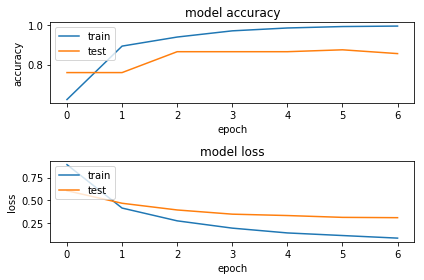


 
 

Without feature 12 : Home to School Travel Time
Test loss: 0.26472542251531894
Test accuracy: 0.9153846153846154


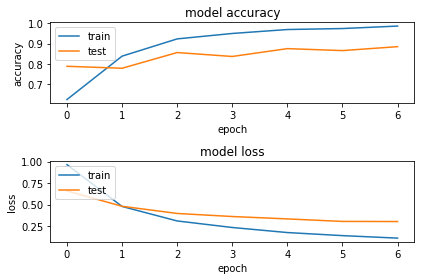


 
 

Without feature 13 : Weekly Study Time
Test loss: 0.24606993748591496
Test accuracy: 0.9076923076923077


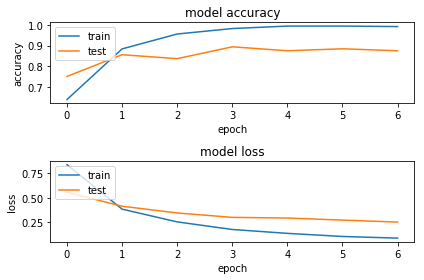


 
 

Without feature 14 : Number of Past Class Failures
Test loss: 0.2725906360607881
Test accuracy: 0.9153846153846154


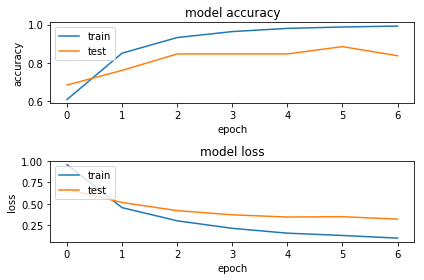


 
 

Without feature 15 : Extra Educational Support
Test loss: 0.23867372732896072
Test accuracy: 0.9307692307692308


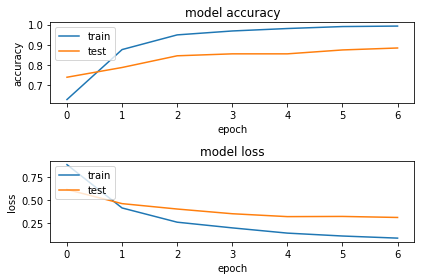


 
 

Without feature 16 : Family Educational Support
Test loss: 0.23070672653042354
Test accuracy: 0.9384615384615385


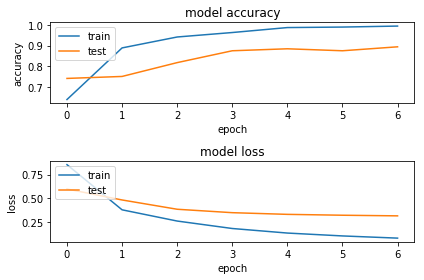


 
 

Without feature 17 : Extra Paid Classes
Test loss: 0.2631831780076027
Test accuracy: 0.9


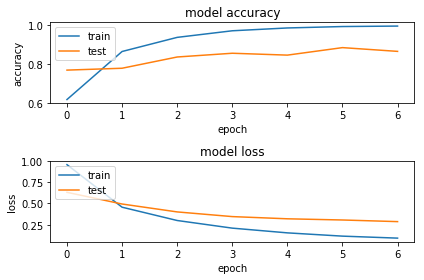


 
 

Without feature 18 : Extra Curricular Activities
Test loss: 0.23956204016621296
Test accuracy: 0.9307692307692308


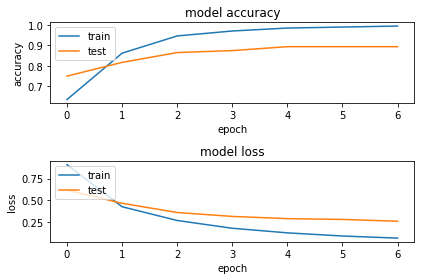


 
 

Without feature 19 : Attended Nursery School
Test loss: 0.2604668012032142
Test accuracy: 0.9153846153846154


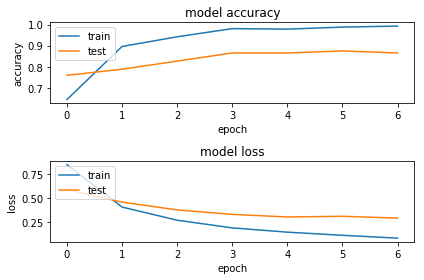


 
 

Without feature 20 : Wants to Take Higher Education
Test loss: 0.228832541176906
Test accuracy: 0.9307692307692308


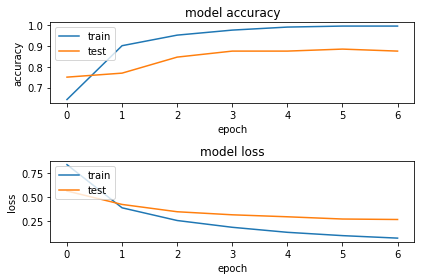


 
 

Without feature 21 : Internet Access at Home
Test loss: 0.23389952927827834
Test accuracy: 0.9230769230769231


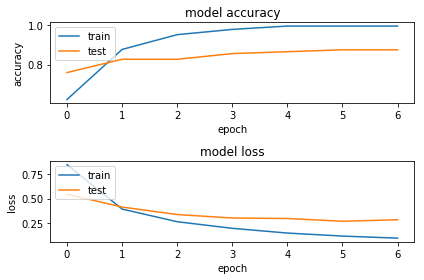


 
 

Without feature 22 : In a Romantic Relationship
Test loss: 0.24677664442704275
Test accuracy: 0.9230769230769231


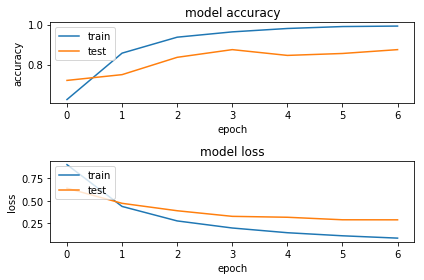


 
 

Without feature 23 : Quality of Family Relationships
Test loss: 0.23816306785895275
Test accuracy: 0.9230769230769231


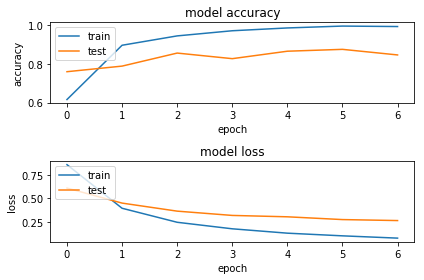


 
 

Without feature 24 : Free Time After School
Test loss: 0.2409837341079345
Test accuracy: 0.9230769230769231


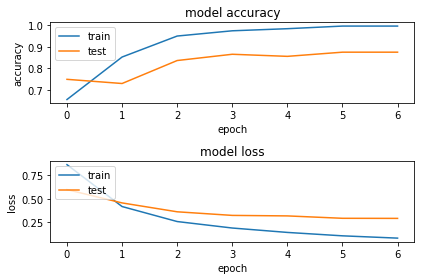


 
 

Without feature 25 : Time Spent Going out With Friends
Test loss: 0.24425360755278513
Test accuracy: 0.9076923076923077


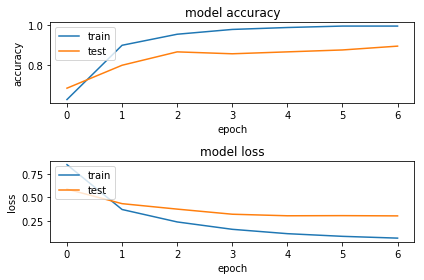


 
 

Without feature 26 : Workday Alcohol Consumption
Test loss: 0.21934921592473983
Test accuracy: 0.9230769230769231


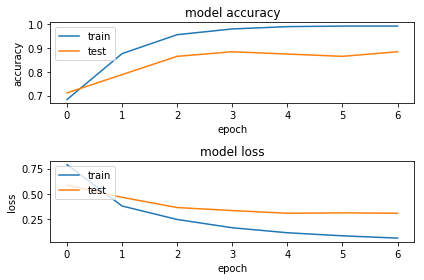


 
 

Without feature 27 : Weekend Alcohol Consumption
Test loss: 0.2679863705084874
Test accuracy: 0.9076923076923077


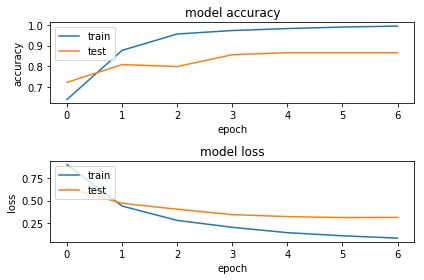


 
 

Without feature 28 : Current Health Status
Test loss: 0.2577975114377645
Test accuracy: 0.9076923076923077


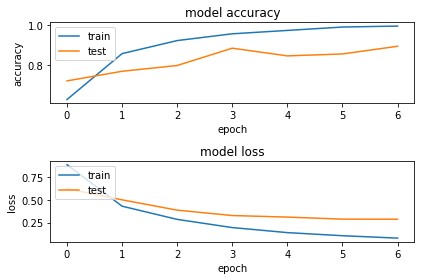


 
 

Without feature 29 : Number of Student Absences
Test loss: 0.23060108663944098
Test accuracy: 0.9076923076923077


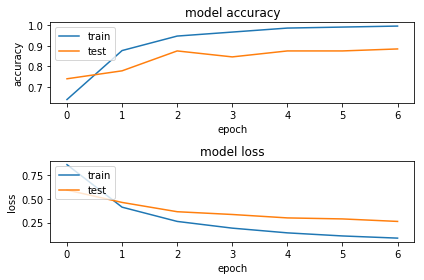


 
 

Without feature 30 : First Period Grade
Test loss: 0.21900273309304163
Test accuracy: 0.9538461538461539


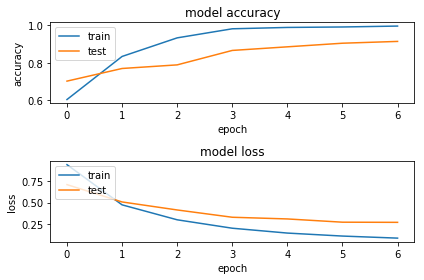


 
 

Without feature 31 : Second Period Grade
Test loss: 0.2797452877347286
Test accuracy: 0.9


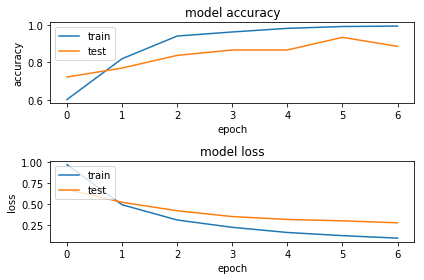

In [108]:
# Analyze the effects of removing one feature on training
# Do this for all input features
for i in range(student_data.shape[1]-1):
    remove_and_analyze(i)
    print("\n \n \n")

# Training and Testing Without Five Features

#### We found that the removal of these five features individually produced results with better accuracy: 1) Internet access at home 2) Wants to take higher education 3) Father's job 4) Mother's job 5) Father's education. If removing them one at a time improves accuracy, what would happen if we removed them all at once? Let's try it.

Test loss: 0.2189620608320603
Test accuracy: 0.9307692307692308


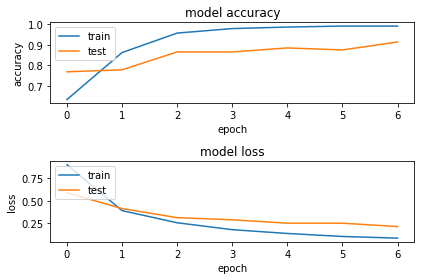

In [109]:
# Delete the five features that most negatively impact accuracy
x = np.delete(student_data, 21, axis = 1)
x = np.delete(x, 20, axis = 1)
x = np.delete(x, 9, axis = 1)
x = np.delete(x, 8, axis = 1)
x = np.delete(x, 7, axis = 1)

# Create feed-forward network
model = keras.Sequential()
create_network(model)

# Split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

# Train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

# Validate using data the network hasn't seen before (testing data)
score = model.evaluate(x_test,y_test, verbose=0)

# Check it's effectiveness
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the data
plot(history)

# Grade Distribution Analysis

#### Wow! That's a lot better! Our accuracy increased from __% to __%. We did this by removing the five features which negatively impacted the accuracy of our net. What about the features that were most beneficial in obtaining a good accuracy? In other words, the removal of which features caused the accuracy rate to decrease?

#### The original study by Cortez and Silva had come to the conclusion that previous grades had the most impact on predicting student performance. However, our goal is not solely to predict student performance but to better understand how non-academic features affect it. The five non-academic features that had the most beneficial effect on our neural net are: 1) Family educational support 2) Reason for choosing school 3) Frequency of going out with friends 4) Amount of free time after school 5) Access to extra paid classes

#### How do we intend to do that? For each feature, we'll seperate student samples into groups according to the value of the featue they exhibit. For example, for the feature "family educational support," we'll divide the student samples according to whether the student has this support or not. We'll only save the final grades since grade distribution is what we'll be analyzing.

#### Let's create a function that takes in an array of final grades (pertaining to students that exhibit a specific value of a feature) and prints a bar graph which displays what percentage of students received F's, D's, C's, B's, or A's. 

In [110]:
# Function for analyzing the percent of students with each grade [F,D,C,B,A]
def analyze(array):
    
    # To hold the total number of students with a certain final grade
    # Index 0 - F. Index 4 - A
    sums = np.array([0,0,0,0,0])
    
    # Iterate through array. Update sums according to whether a student got a final grade of a(n)
    for i in range(len(array)):
        # F
        if(array[i]==0):
            sums[0] += 1
        # D
        elif(array[i]==1):
            sums[1] +=1
        # C
        elif(array[i]==2):
            sums[2] +=1
        # B
        elif(array[i]==3):
            sums[3] +=1
        # A
        else:
            sums[4] += 1
            
    # Total number of students
    total = sums[0] + sums[1] + sums[2] + sums[3] + sums[4]
    
    # Hold percentage of students with grade of [F,D,C,B,A]
    percentages = np.array([sums[0]/total*100, 
                            sums[1]/total*100, 
                            sums[2]/total*100, 
                            sums[3]/total*100, 
                            sums[4]/total*100])
    
    # One bar for each of the 5 grades
    x = np.array([1,2,3,4,5])
    
    # Descriptions for each bar. None on y-axis
    plt.xticks(np.arange(6), ('', 'F', 'D', 'C', 'B','A'))
    
    # X axis - grades. Y axis - percentage of students with each grade
    plt.bar(x,percentages)
    plt.xlabel("Grades")
    plt.ylabel("Percentage of Students")
    
    # Display bar graph
    plt.show()
    
    # Display percentages
    print(percentages)

#### Now let's analyze the distribution of grades among our top five non-academic features!

## Family Educational Support

#### First, let's create the arrays we want to analyze. One with the final grades of students who do have family educational support and one with the final grades of students that don't.

In [111]:
# Array holding final grades of all students who have family educational support
fam_sup = []
# Array holding final grades of all students who have family educational support
no_fam_sup = []

# Iterate through all student samples
for i in range(student_data.shape[0]):
    
    # Does the student have family educational support? (-1 no, 1 yes)
    sup = student_data[i][16]
    
    # Append student's final grade to corresponding array
    if(sup==1):
        fam_sup.append(student_data[i][32])
    else:
        no_fam_sup.append(student_data[i][32])

#### Analyze!

### Family Educational Support

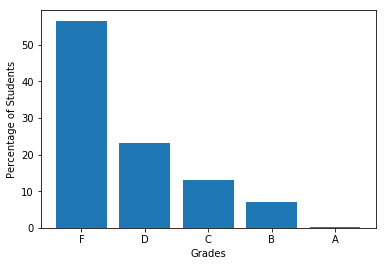

[56.53266332 23.11557789 13.06532663  7.03517588  0.25125628]


In [112]:
analyze(fam_sup)

### No Family Educational Support

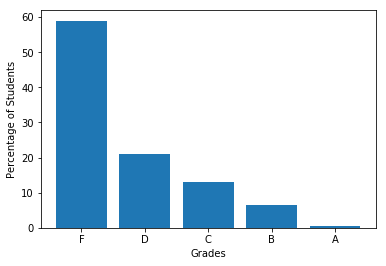

[58.96414343 21.11553785 13.14741036  6.37450199  0.39840637]


In [113]:
analyze(no_fam_sup)

#### Surprisingly, there is not much of a difference in the distribution. Among students with family educational support, the amount of students who got an F was 2% less than among students without this support. However, this 2% seemed to float into the D-range. This does show that the support might prove helpful to some students but it is not as crucial to grade distribution overall.

#### It's imporant to note that only 2 students in the entire date set achieved a final grade of an A.

#### We're going to take a similar approach for the next four features.

## Reason for choosing school

In [114]:
# Each array holds the grades of students who chose to go to their school for that reason
# Close to home
reason1 = []
# School reputation
reason2 = []
# Course prefrence
reason3 = []
# Other
reason4 = []

# Values that represent these unique reasons. They are not integer numbers like in the previous
## example. They're floatig point numbers so we'll save them so we can compare them to the value
## of this feature in each sample
unique_reasons = np.unique(student_data[:,10])

# Iterate through all student samples and append final grades to corresponding arrays 
for i in range(student_data.shape[0]):
    
    reason = student_data[i][10]
   
    if(reason==unique_reasons[0]):
        reason1.append(student_data[i][32])
    elif(reason==unique_reasons[1]):
        reason2.append(student_data[i][32])
    elif(reason==unique_reasons[2]):
        reason3.append(student_data[i][32])
    else:
        reason4.append(student_data[i][32])

### Reason 1: Close to Home

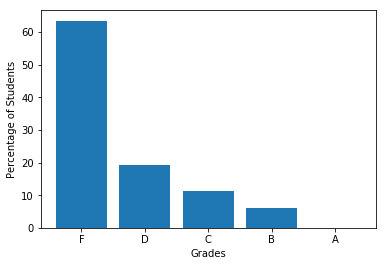

[63.50877193 19.29824561 11.22807018  5.96491228  0.        ]


In [115]:
analyze(reason1)

### Reason 2: School Reputation

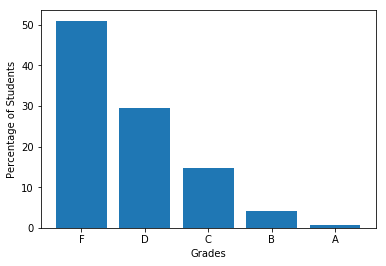

[51.00671141 29.53020134 14.76510067  4.02684564  0.67114094]


In [116]:
analyze(reason2)

### Reason 3: Course Prefrence

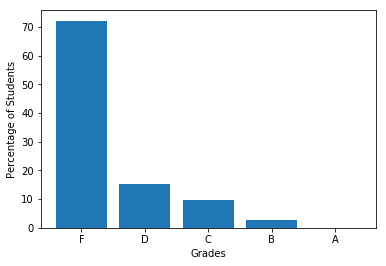

[72.22222222 15.27777778  9.72222222  2.77777778  0.        ]


In [117]:
analyze(reason3)

### Reason 4: Other

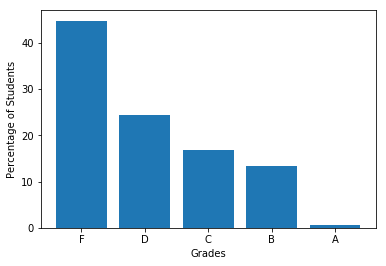

[44.75524476 24.47552448 16.78321678 13.28671329  0.6993007 ]


In [118]:
analyze(reason4)

#### By far, the worst distribution of grades pertains to the students who chose their school based on course prefrence. Why could this be? Perhaps these students want to go to a school with supposedly easier classes and therefore are less motivated to perform better. Or perhaps they chose easier classes because they struggle academically. Either way, this is interesting because you would think that giving students the choice to choose their school based on the courses offered would motivate them to perform better.

#### The next worst distribution belongs to the students who chose this school because it is close to home. This could be because there was no academic motivation behind this reason or maybe the student had no means of transportation to go to another school which opens up the possibility of other factors that could affect student performance.

#### School reputation had a much more gradual distribution but by far students who chose a reason other than the aforementioned features did by far the best. They had the lowest percentage of F's and the highest percentage of C's and B's. One student got an A. The other student that got an A based their selection of school reputation. This begs the questions, why did these students pick their school and why do they seem to do so much better?

## Frequency of Going Out With Friends

In [119]:
# Each array holds the grades of students who go out with friends for that specified amount of time 
# (1 - very low, 5 - very high)
go_out1 = []
go_out2 = []
go_out3 = []
go_out4 = []
go_out5 = []

# Floating point values representing frequency
unique = np.unique(student_data[:,25])

# Iterate through all student samples and append final grades to corresponding arrays 
for i in range(student_data.shape[0]):
    
    frequency = student_data[i][25]
    
    if(frequency==unique[0]):
        go_out1.append(student_data[i][32])
    elif(frequency==unique[1]):
        go_out2.append(student_data[i][32])
    elif(frequency==unique[2]):
        go_out3.append(student_data[i][32])
    elif(frequency==unique[3]):
        go_out4.append(student_data[i][32])
    else:
        go_out5.append(student_data[i][32])

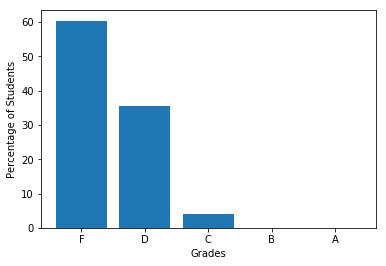

[60.41666667 35.41666667  4.16666667  0.          0.        ]


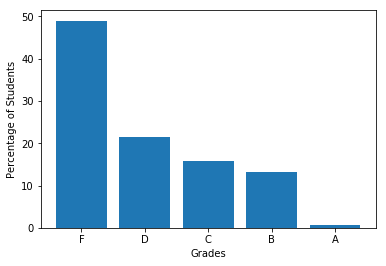

[48.96551724 21.37931034 15.86206897 13.10344828  0.68965517]


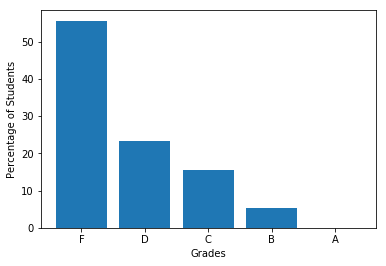

[55.6097561  23.41463415 15.6097561   5.36585366  0.        ]


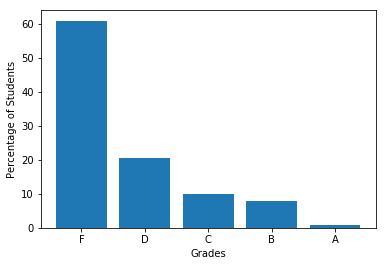

[60.9929078  20.56737589  9.92907801  7.80141844  0.70921986]


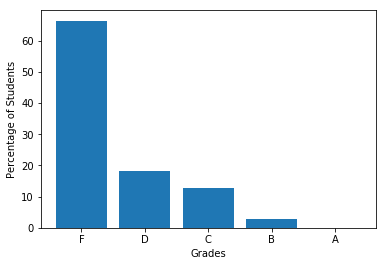

[66.36363636 18.18181818 12.72727273  2.72727273  0.        ]


In [121]:
analyze(go_out1)
analyze(go_out2)
analyze(go_out3)
analyze(go_out4)
analyze(go_out5)

#### From these results, we can see that it is important for students to spend some time with friends. Those who minimally went out with friends did the worst academically. None of them got B's or A's and 95.8% of them either got an F or a D. However, students with the most amount of time spent going out had the highest percentage of F's (66.4%)
#### By far, the students who did the best ranked the amount of time spent going out with friends at a 2 (low). Grade distributions got worse as the amount of time students spent going out with friends increased.
#### This shows that social activity is important for student success but it should be limited. The time these students are not spending going out is probably spent preparing for school.

## Free Time after School

In [122]:
# Each array holds the grades of students who have the specified amount of free time after school 
# (1 - very low, 5 - very high)
free1 = []
free2 = []
free3 = []
free4 = []
free5 = []

# Floating point values representing frequency
unique = np.unique(student_data[:,24])

# Iterate through all student samples and append final grades to corresponding arrays 
for i in range(student_data.shape[0]):
   
    frequency = student_data[i][24]
    
    if(frequency==unique[0]):
        free1.append(student_data[i][32])
    elif(frequency==unique[1]):
        free2.append(student_data[i][32])
    elif(frequency==unique[2]):
        free3.append(student_data[i][32])
    elif(frequency==unique[3]):
        free4.append(student_data[i][32])
    else:
        free5.append(student_data[i][32])

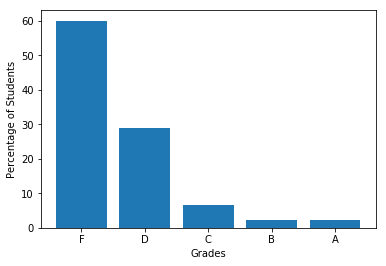

[60.         28.88888889  6.66666667  2.22222222  2.22222222]


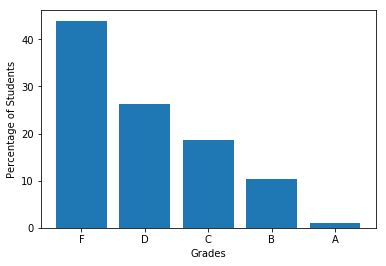

[43.92523364 26.1682243  18.69158879 10.28037383  0.93457944]


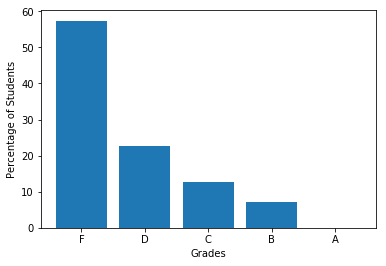

[57.37051793 22.70916335 12.74900398  7.17131474  0.        ]


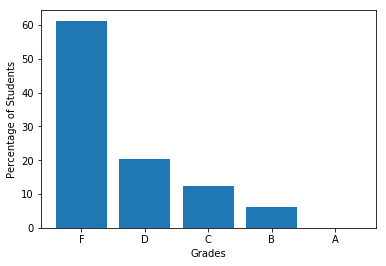

[61.23595506 20.2247191  12.35955056  6.17977528  0.        ]


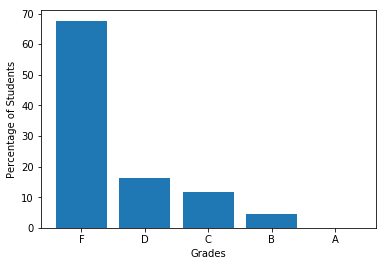

[67.64705882 16.17647059 11.76470588  4.41176471  0.        ]


In [123]:
analyze(free1)
analyze(free2)
analyze(free3)
analyze(free4)
analyze(free5)

#### Interesting...our results are very similar to that of our previous example. Overall, those with the least amount of free time did the worst but those with the most had the highest percentage of students with an F (67.6...very close to the previous 66.4). Those who did the best had the second-least amount of free time and performace seems to decreaese from there. There seems to be a sort of "sweet-spot" when it comes to free time and going out with friends.

## Extra Paid Classes

#### Last feature to analyze...how sad this is coming to an end.

In [124]:
# Array holding final grades of all students who have extra paid classes
paid_class = []
# Array holding final grades of all students who do not have extra paid classes
no_paid_class = []

# Iterate through all student samples and append final grades to corresponding arrays 
for i in range(student_data.shape[0]):
    
    paid = student_data[i][17]
    
    if(paid==1):
        paid_class.append(student_data[i][32])
    else:
        no_paid_class.append(student_data[i][32])

### Extra Paid Classes

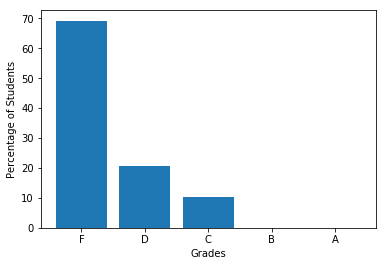

[69.23076923 20.51282051 10.25641026  0.          0.        ]


In [125]:
analyze(paid_class)

### No Extra Paid Classes

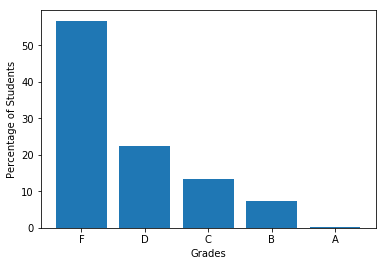

[56.72131148 22.45901639 13.27868852  7.21311475  0.32786885]


In [126]:
analyze(no_paid_class)

#### Well, isn't this intriguing? One would think that those with extra paid classes would perform better than those without them but it seems that the opposite is the case. Are the students who are attending these classes not motivated to put in work outside of classes because they believe they have sufficient knowledge thanks to these classes? Or are have they been struggling academically to begin with and that's why they are in these classes?

# Final Thoughts

#### We hope you found this dive into student data as fascinating as we did. Our students are our future and as such we should invest in them. This means more than just funding schools and after school programs. We need to be focusing on the right features and understand the consequences of them. This way, we can make the most informed decision that would best benefit our students.